## Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
764,7969-FFOWG,Male,0,Yes,Yes,65,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.90,1292.6,No
6092,4024-CSNBY,Female,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),94.25,6849.75,No
6740,7957-RYHQD,Female,1,No,No,40,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),79.20,3233.85,Yes
4083,0324-BRPCJ,Female,1,Yes,No,68,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.20,6851.65,Yes
4360,2675-OTVVJ,Male,1,Yes,No,31,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,No,Month-to-month,No,Electronic check,89.45,2807.65,No


In [3]:
df.drop("customerID", axis=1, inplace=True) # to drop a column as its of no use

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
pd.to_numeric(df.TotalCharges, errors="coerce").isnull() # Though there was "-" in some rows it has ignored them or replaced with some nan values and proceed further

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df.TotalCharges, errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df1=df[df.TotalCharges!=" "]
df1.shape

(7032, 20)

In [10]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13280\695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [11]:
df1.TotalCharges.dtype

dtype('float64')

In [12]:
df1[df1.Churn=="No"]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


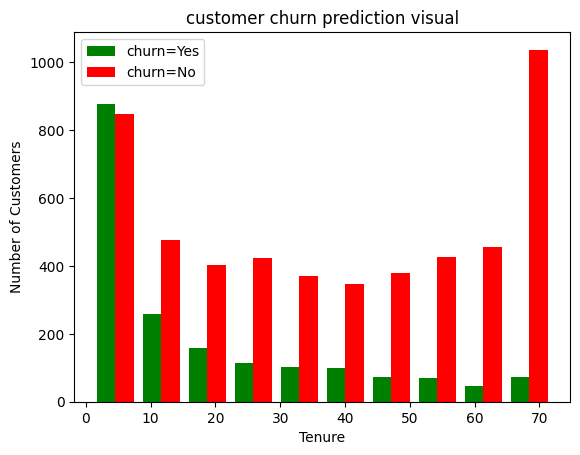

In [13]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.title("customer churn prediction visual")

plt.hist([tenure_churn_yes, tenure_churn_no], color=["Green","Red"], label=["churn=Yes","churn=No"])
plt.legend()

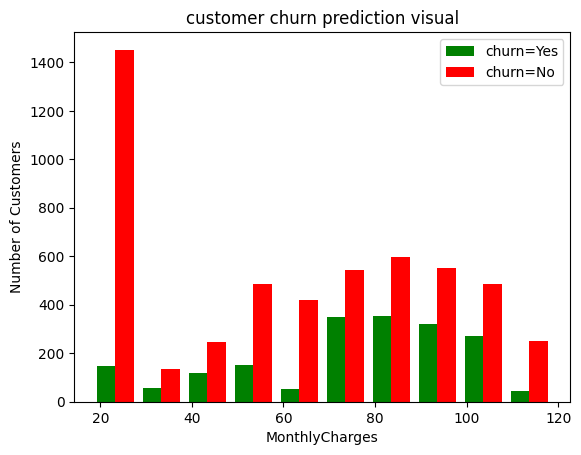

In [14]:
MonthlyCharges_churn_no=df1[df1.Churn=="No"].MonthlyCharges
MonthlyCharges_churn_yes=df1[df1.Churn=="Yes"].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number of Customers")
plt.title("customer churn prediction visual")

plt.hist([MonthlyCharges_churn_yes, MonthlyCharges_churn_no], color=["Green", "Red"], label=["churn=Yes","churn=No"])
plt.legend()


In [15]:
def print_unique_column_values(df):
    for column in df:
        if df[column].dtype=="object":
            print(f"{column} : {df[column].unique()}")

print_unique_column_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [16]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13280\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13280\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [17]:
print_unique_column_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [18]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
            'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [19]:
for column in yes_no_columns:
    df1[column].replace({"Yes":1,"No":0},inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13280\2850571194.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[column].replace({"Yes":1,"No":0},inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13280\2850571194.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[column].replace({

In [20]:
for column in df1:
    print(f"{column}:{df1[column].unique()}")

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [21]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13280\698335744.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13280\698335744.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].re

In [22]:
df1['gender'].unique()

array([1, 0], dtype=int64)

In [23]:
pd.get_dummies(data=df1,columns=["InternetService"])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,True,False,False
1,0,0,0,0,34,1,0,1,0,1,...,0,One year,0,Mailed check,56.95,1889.50,0,True,False,False
2,0,0,0,0,2,1,0,1,1,0,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,True,False,False
3,0,0,0,0,45,0,0,1,0,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,True,False,False
4,1,0,0,0,2,1,0,0,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,One year,1,Mailed check,84.80,1990.50,0,True,False,False
7039,1,0,1,1,72,1,1,0,1,1,...,1,One year,1,Credit card (automatic),103.20,7362.90,0,False,True,False
7040,1,0,1,1,11,0,0,1,0,0,...,0,Month-to-month,1,Electronic check,29.60,346.45,0,True,False,False
7041,0,1,1,0,4,1,1,0,0,0,...,0,Month-to-month,1,Mailed check,74.40,306.60,1,False,True,False


In [24]:

pd.get_dummies(data=df1,columns=['PaymentMethod'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,DSL,0,1,...,0,Month-to-month,1,29.85,29.85,0,False,False,True,False
1,0,0,0,0,34,1,0,DSL,1,0,...,0,One year,0,56.95,1889.50,0,False,False,False,True
2,0,0,0,0,2,1,0,DSL,1,1,...,0,Month-to-month,1,53.85,108.15,1,False,False,False,True
3,0,0,0,0,45,0,0,DSL,1,0,...,0,One year,0,42.30,1840.75,0,True,False,False,False
4,1,0,0,0,2,1,0,Fiber optic,0,0,...,0,Month-to-month,1,70.70,151.65,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,...,1,One year,1,84.80,1990.50,0,False,False,False,True
7039,1,0,1,1,72,1,1,Fiber optic,0,1,...,1,One year,1,103.20,7362.90,0,False,True,False,False
7040,1,0,1,1,11,0,0,DSL,1,0,...,0,Month-to-month,1,29.60,346.45,0,False,False,True,False
7041,0,1,1,0,4,1,1,Fiber optic,0,0,...,0,Month-to-month,1,74.40,306.60,1,False,False,False,True


In [25]:
pd.get_dummies(data=df1,columns=['Contract'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,1,0,1,0,0,DSL,0,1,...,0,0,1,Electronic check,29.85,29.85,0,True,False,False
1,0,0,0,0,34,1,0,DSL,1,0,...,0,0,0,Mailed check,56.95,1889.50,0,False,True,False
2,0,0,0,0,2,1,0,DSL,1,1,...,0,0,1,Mailed check,53.85,108.15,1,True,False,False
3,0,0,0,0,45,0,0,DSL,1,0,...,0,0,0,Bank transfer (automatic),42.30,1840.75,0,False,True,False
4,1,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,1,Electronic check,70.70,151.65,1,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,...,1,1,1,Mailed check,84.80,1990.50,0,False,True,False
7039,1,0,1,1,72,1,1,Fiber optic,0,1,...,1,1,1,Credit card (automatic),103.20,7362.90,0,False,True,False
7040,1,0,1,1,11,0,0,DSL,1,0,...,0,0,1,Electronic check,29.60,346.45,0,True,False,False
7041,0,1,1,0,4,1,1,Fiber optic,0,0,...,0,0,1,Mailed check,74.40,306.60,1,True,False,False


In [26]:
df2=pd.get_dummies(data=df1,columns=['Contract','PaymentMethod','InternetService'])
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
3223,0,0,1,0,3,0,0,0,1,0,...,True,False,False,False,True,False,False,True,False,False
2552,1,0,1,0,47,1,1,0,0,0,...,False,True,False,False,False,True,False,False,False,True
4981,0,0,0,0,14,0,0,0,0,1,...,True,False,False,False,False,True,False,True,False,False
3158,0,0,1,0,18,1,0,0,0,1,...,True,False,False,False,False,False,True,True,False,False
673,0,0,0,0,22,1,1,0,0,0,...,True,False,False,False,True,False,False,False,False,True


In [27]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
Contract_Month-to-month                       bool
Contract_One year                             bool
Contract_Two year              

In [28]:
col_to_scale=["tenure","MonthlyCharges","TotalCharges"]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df2[col_to_scale]=scaler.fit_transform(df2[col_to_scale])

In [29]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
6169,1,0,0,0,0.000000,1,0,0,0,0,...,True,False,False,True,False,False,False,True,False,False
6414,0,0,1,1,0.549296,1,1,0,0,0,...,False,False,True,False,True,False,False,False,False,True
4754,0,0,1,0,0.943662,1,1,0,0,0,...,False,False,True,True,False,False,False,False,False,True
3608,0,0,0,0,0.535211,1,1,0,0,0,...,True,False,False,False,False,True,False,False,True,False
6138,0,1,1,0,0.929577,1,1,1,1,0,...,True,False,False,True,False,False,False,False,True,False


In [30]:
for column in df2:
    print(f"{column} :{df2[column].unique()}")

gender :[1 0]
SeniorCitizen :[0 1]
Partner :[1 0]
Dependents :[0 1]
tenure :[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService :[0 1]
MultipleLines :[0 1]
OnlineSecurity :[0 1]
OnlineBackup :[1 0]
DeviceProtection :[0 1]
TechSupport :[

# Train-Test Splitting

In [31]:
X=df2.drop("Churn", axis=1)
y=df2['Churn']

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [33]:
X_train.shape

(5625, 26)

In [34]:
X_test.shape

(1407, 26)

In [36]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 2.4/390.3 MB 13.4 MB/s eta 0:00:30
    --------------------------------------- 5.2/390.3 MB 12.7 MB/s eta 0:00:31
    --------------------------------------- 9.7/390.3 MB 15.5 MB/s eta 0:00:25
   - -------------------------------------- 12.8/390.3 MB 15.2 MB/s eta 0:00:25
   - -------------------------------------- 15.7/390.3 MB 15.7 MB/s eta 0:00:24
   - -------------------------------------- 19.4/390.3 MB 15.3 MB/s eta 0:00:25
   -- ------------------------------------- 22.3/390.3 MB 14.8 MB/s eta 0:00:25
   -- ------------------------------------- 25.2/390.3 MB 14.9 MB/s eta 0:00:25
   -- ------------------------------------- 27.3/390.3 MB 14.4 MB/s eta 0:00:26
   --- ------------------------------------ 30.1/390.3 MB 14.1 MB/s eta 0:00:26
   --- ------------------------------------ 33.8/390.3


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
def ANN(X_train,X_test,y_train,y_test,loss,weights):
    model=keras.Sequential([keras.layers.Dense(20, input_shape=(26,), activation='relu'), 
                        keras.layers.Dense(15, activation='relu'),
                        keras.layers.Dense(1, activation='sigmoid'),])

    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    if weights==-1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs=100,class_weight=weights)

    print(model.evaluate(X_test,y_test))
    y_preds=model.predict(X_test)
    y_preds=np.round(y_preds)

    print("Classification Report: \n",classification_report(y_test,y_preds))
    return y_preds

In [39]:
y_preds=ANN(X_train,X_test,y_train,y_test,'binary_crossentropy',-1)

C:\Users\LENOVO\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7382 - loss: 0.5616
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7880 - loss: 0.4420
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7899 - loss: 0.4283
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8075 - loss: 0.4140
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7999 - loss: 0.4193
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8009 - loss: 0.4187
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8105 - loss: 0.4117
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7956 - loss: 0.4249
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8067 - loss: 0.4051
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8069 - loss: 0.4186
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8017 - loss: 0.4054
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

Text(95.72222222222221, 0.5, 'Truth')

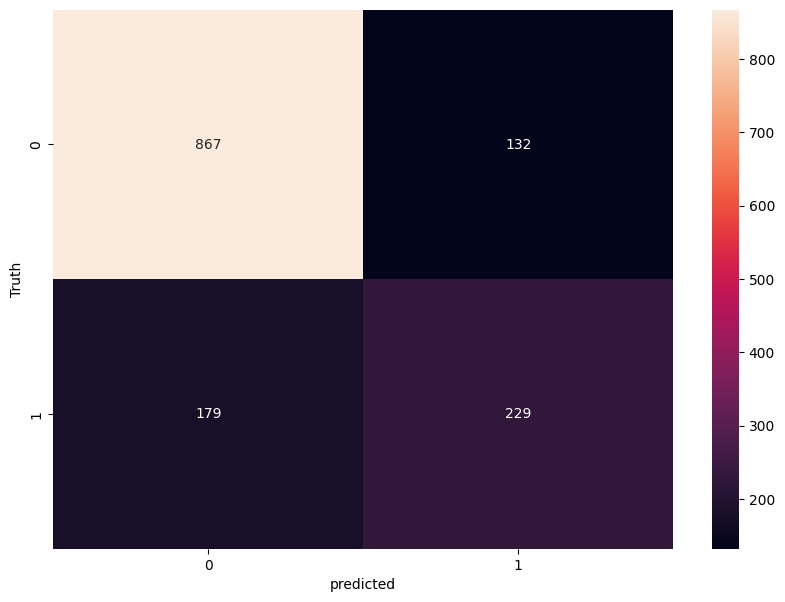

In [41]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_preds)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')


In [42]:
accuracy=round((878+206)/(878+206+121+202),2)
accuracy

0.77

Precision for 0 class. i.e. precision for customers who didn't churn up

In [43]:
878/(878+202)

0.812962962962963

Precision for 1 class. i.e. precision for customers who churned up

In [44]:
206/(206+121)

0.6299694189602446

Recall for 0 class. i.e. recall for customers who didn't churn up

In [45]:
round(878/(878+121),2)

0.88

Recall for 1 class. i.e. recall for customers who churned up

In [46]:
round(202/(202+206),2)

0.5